In [200]:
import numpy as np 
import pandas as pd 


In [201]:
data = pd.read_csv('deliveries.csv')

In [202]:
data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


# Method to find out top 5 batsman according to their run

In [203]:
new_data = data.groupby('batsman')
new_data2 = new_data.sum().sort_values('batsman_runs',ascending=False).head(5)


In [204]:
new_data2['batsman_runs']

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

# Top 5 batsmans to score most 4's 

In [205]:
data.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [206]:
mask= data['batsman_runs']==3
new_data4 = data[mask]

In [207]:
# first method  =  new_data4.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head()
# 2nd method = lower one 
new_data4.groupby('batsman').size().sort_values(ascending=False).head()

batsman
M Vijay      17
S Dhawan     16
G Gambhir    15
AM Rahane    14
DA Warner    13
dtype: int64

# Run scored by a batsman against all teams

In [208]:
bats = data['batsman'] == 'V Kohli'
bats2 = data[bats]

In [209]:
bats3 = bats2.groupby('bowling_team').sum()

In [210]:
bats3['batsman_runs'].sort_values(ascending=False).head()

bowling_team
Chennai Super Kings    706
Delhi Daredevils       661
Kings XI Punjab        483
Mumbai Indians         447
Sunrisers Hyderabad    439
Name: batsman_runs, dtype: int64

In [211]:
# a function of the above code
def most_run(Batsman):
    bat = data['batsman'] == Batsman
    bat2 = data[bat]
    bat3 = bat2 = bat2.groupby('bowling_team').sum()
    return bat3['batsman_runs'].sort_values(ascending =False).head()

In [212]:
most_run('CH Gayle') 

bowling_team
Kings XI Punjab          797
Kolkata Knight Riders    532
Mumbai Indians           469
Delhi Daredevils         383
Pune Warriors            383
Name: batsman_runs, dtype: int64

# The isin() function

 find the most destructive batsman in the death overs on the basis of runs



In [213]:
data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [214]:
death_over= data['over']==20
death_over2 = data[death_over]

In [215]:
death_over3 = death_over2.groupby('batsman').sum().sort_values('batsman_runs',ascending=False).head()

In [216]:
death_over3['batsman_runs']

batsman
MS Dhoni           435
RG Sharma          231
KA Pollard         221
Harbhajan Singh    185
JP Duminy          168
Name: batsman_runs, dtype: int64

 find the most destructive batsman in the death overs on the basis of strike rate

 minimum 200 balls palyed by the batsman in 16-20 overs
 
 strike rate = (no of runs/ no of balls )*100


In [217]:
# from 16 to 20 over 
new_data = data[data['over']>15]   # just like upper wale me kiya tha 

In [218]:
all_batsman = new_data.groupby('batsman')['batsman_runs'].count()
x = all_batsman > 200                                                   # imp. method called boolean indexing 
batsman_list = all_batsman[x].index.tolist()        #   tolist() => convert index object to a list 

In [219]:
# run scored by all 43 batsman 
# balls played by all 43 batsman

final = new_data[new_data['batsman'].isin(batsman_list)]  

In [220]:
no_of_runs = final.groupby('batsman')['batsman_runs'].sum()
no_of_balls = final.groupby('batsman')['batsman_runs'].count()

In [221]:
strike_rate = (no_of_runs/no_of_balls)*100

In [222]:
strike_rate  

batsman
A Mishra            100.888889
AB de Villiers      211.052632
AD Mathews          147.058824
AM Rahane           152.985075
AR Patel            142.794760
AT Rayudu           165.411765
BJ Hodge            157.402597
DA Miller           186.666667
DA Warner           189.473684
DJ Bravo            167.726161
DJ Hussey           175.213675
DPMD Jayawardene    152.032520
Harbhajan Singh     147.607656
IK Pathan           142.580645
JA Morkel           149.882353
JH Kallis           170.562771
JP Duminy           167.760618
JP Faulkner         149.319728
KA Pollard          161.336516
KD Karthik          152.051836
KM Jadhav           144.378698
LRPL Taylor         152.941176
MK Pandey           151.785714
MK Tiwary           140.189125
MS Dhoni            169.607843
NV Ojha             134.868421
P Kumar             109.701493
PP Chawla           120.257235
R Vinay Kumar       108.936170
RA Jadeja           130.729167
RG Sharma           175.668449
RV Uthappa          173.454545


In [223]:
strike_rate.sort_values(ascending=False).head(10)

batsman
AB de Villiers    211.052632
DA Warner         189.473684
DA Miller         186.666667
V Kohli           181.868132
RG Sharma         175.668449
DJ Hussey         175.213675
RV Uthappa        173.454545
Yuvraj Singh      171.124031
JH Kallis         170.562771
MS Dhoni          169.607843
Name: batsman_runs, dtype: float64

# Merge function

we have to find out the list of orange cap holder season wise

In [224]:
# Merge 
delivery = pd.read_csv('deliveries.csv')
match = pd.read_csv('matches.csv')

In [225]:
new = delivery.merge(match,left_on = 'match_id',right_on='id')

In [226]:
new.shape

(150460, 39)

In [227]:
print(delivery.shape)
print(match.shape)

(150460, 21)
(636, 18)


In [228]:
new.groupby(['season','batsman'])['batsman_runs'].sum ()             #  give a series with 2 different indexes and only 1 value

season  batsman          
2008    A Chopra              42
        A Kumble              13
        A Mishra              37
        A Mukund               0
        A Nehra                3
                            ... 
2017    Washington Sundar      9
        YK Pathan            143
        YS Chahal             13
        Yuvraj Singh         252
        Z Khan                 4
Name: batsman_runs, Length: 1531, dtype: int64

In [229]:
# to convrt any series to dataframe . we use reset_index
final2 = new.groupby(['season','batsman'])['batsman_runs'].sum ().sort_values(ascending=False).reset_index().drop_duplicates(subset='season',keep='first')

In [230]:
final2.sort_values('season')

,season,batsman,batsman_runs
10,2008,SE Marsh,616
14,2009,ML Hayden,572
9,2010,SR Tendulkar,618
11,2011,CH Gayle,608
2,2012,CH Gayle,733
3,2013,MEK Hussey,733
6,2014,RV Uthappa,660
17,2015,DA Warner,562
0,2016,V Kohli,973
7,2017,DA Warner,641


# Pivot table

In [231]:
food = pd.read_csv('food.csv')

In [232]:
food.head()

,Name,Gender,City,Frequency,Item,Spends
0,Nitish,M,Kolkata,Weekly,Burger,11
1,Anu,F,Gurgaon,Daily,Sandwich,14
2,Mukku,M,Kolkata,Once,Vada,25
3,Suri,M,Kolkata,Monthly,Pizza,56
4,Rajiv,M,Patna,Never,Paneer,34


In [233]:
food.pivot_table(index=['City','Gender'],columns  =['Item','Frequency'],values='Spends',aggfunc ='mean')

Item                 Burger                                              \
Frequency             Daily    Monthly      Never       Once     Weekly   
City      Gender                                                          
Ahmedabad F       55.216418  51.317568  52.564885  55.748148  50.111111   
          M       50.172131  50.306667  51.284553  49.912698  51.212121   
Bangalore F       51.337748  51.798319  51.649254  54.760331  52.226667   
          M       47.243056  53.394366  53.578947  56.201439  52.702290   
Chennai   F       57.045802  52.098485  54.098684  52.751724  45.883333   
          M       51.019355  51.267606  54.703704  49.652174  51.580420   
Delhi     F       56.487805  50.308725  47.135714  56.042254  52.136691   
          M       51.125926  52.677165  53.842975  49.959459  55.299270   
Gurgaon   F             NaN        NaN        NaN        NaN        NaN   
Hyderabad F       50.429630  56.683453  51.138686  55.255172  51.000000   
          M       49.356589  53.639098  51.138462  47.680272  53.743902   
Kolkata   F       56.484375  50.900709  54.695312  50.956204  51.286765   
          M       54.161290  52.548387  54.695035  51.684564  53.521127   
Mumbai    F       51.378788  54.304688  50.819444  51.255319  56.559441   
          M       54.698630  51.695364  49.654412  54.053846  53.393939   
Patna     M             NaN        NaN        NaN        NaN        NaN   
Pune      F       50.226415  54.142857  51.787879  51.974576  54.826389   
          M       55.285714  53.147541  53.100775  52.273438  52.789474   

Item               Chowmein                                              ...  \
Frequency             Daily    Monthly      Never       Once     Weekly  ...   
City      Gender                                                         ...   
Ahmedabad F       55.063380  56.783784  50.168000  51.724638  49.559748  ...   
          M       51.428571  52.302817  53.643312  52.369231  56.546099  ...   
Bangalore F       54.859259  53.801418  55.078014  51.163934  51.053435  ...   
          M       53.000000  53.654088  53.740157  51.254098  51.892086  ...   
Chennai   F       51.051852  54.129771  53.863636  49.578512  52.170543  ...   
          M       51.931298  56.717791  50.732026  54.392593  55.033333  ...   
Delhi     F       50.794118  54.500000  51.407407  48.225806  51.565217  ...   
          M       50.398551  49.946667  51.814286  55.344262  49.234375  ...   
Gurgaon   F             NaN        NaN        NaN        NaN        NaN  ...   
Hyderabad F       54.288000  53.993333  50.400000  52.791045  50.324503  ...   
          M       51.595745  53.353741  54.955128  50.272727  51.090164  ...   
Kolkata   F       51.200000  53.245509  54.225352  50.541935  49.281879  ...   
          M       53.621429  54.125000  50.000000  53.745902  51.343750  ...   
Mumbai    F       56.142857  48.722973  54.340909  53.929032  49.037500  ...   
          M       49.500000  52.694656  57.140940  49.376623  54.917293  ...   
Patna     M             NaN        NaN        NaN        NaN        NaN  ...   
Pune      F       50.744681  56.443548  55.704225  51.751634  48.925620  ...   
          M       55.425373  52.448000  52.906667  52.330882  55.887417  ...   

Item               Sandwich                                              \
Frequency             Daily    Monthly      Never       Once     Weekly   
City      Gender                                                          
Ahmedabad F       52.503311  50.303448  49.549296  53.368794  53.429577   
          M       51.900000  53.976378  51.338346  50.916667  51.173333   
Bangalore F       55.168919  52.287671  51.671533  54.100000  51.111111   
          M       53.407407  52.503876  51.073529  53.250000  55.901408   
Chennai   F       50.958042  49.000000  55.230303  53.208955  54.992958   
          M       55.237500  52.149660  51.408000  53.885906  53.822222   
Delhi     F       50.795181  49.840909  56.614286  49.952703  52.299

In [234]:
delivery = pd.read_csv('deliveries.csv')
match = pd.read_csv('matches.csv')

In [235]:
total = delivery.merge(match,left_on ='match_id',right_on = 'id')

In [254]:
total.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [237]:
mask = delivery['batsman_runs']==6
six = delivery[mask]
six.shape

(6523, 21)

In [238]:
pt = six.pivot_table(index='over',columns='batting_team',values='batsman_runs',aggfunc='count') 

In [239]:
import seaborn as sns

<Axes: xlabel='batting_team', ylabel='over'>

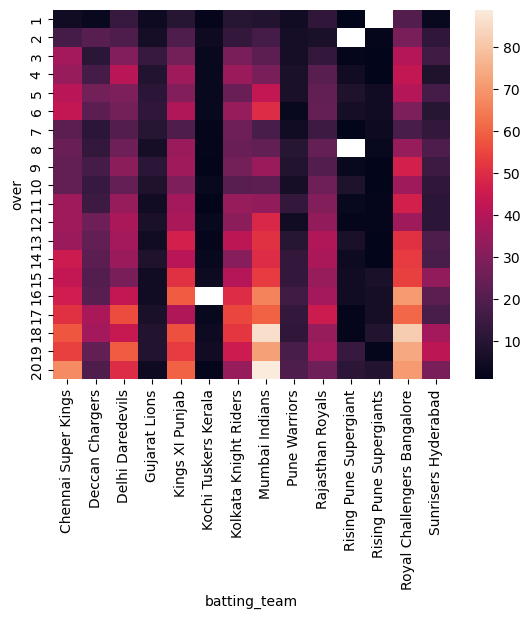

In [240]:
sns.heatmap(pt) 

# Correlation function

In [241]:
match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [242]:
match = pd.read_csv('matches.csv')

In [243]:
now_match = match.corr(numeric_only = True)

<Axes: >

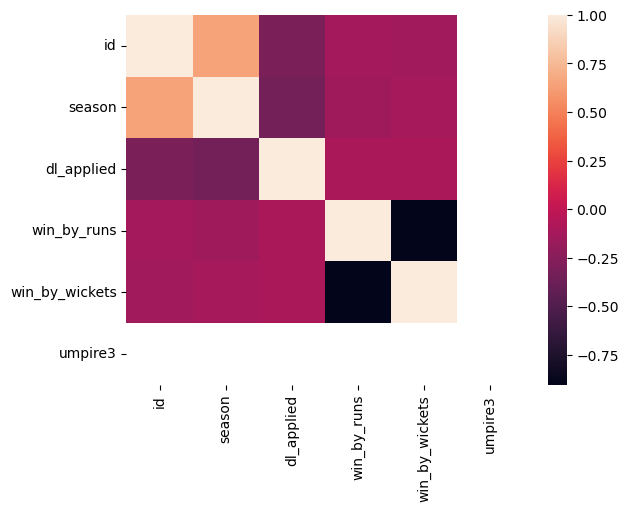

In [244]:
sns.heatmap(now_match.corr())

# The rename function (rename cols)

In [245]:
match.rename(columns = {'city':'place','date':'dom'})

,id,season,place,dom,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


# set_index() and reset_index()

In [246]:
match.set_index('id')  # set index as id , not self generared index

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN


In [247]:
match.set_index('id',inplace=True)

In [250]:
match.reset_index(inplace=True)

In [251]:
match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [253]:
match['winner'].value_counts().reset_index()    #add 0,1,2,3..... in the starting and make the series to dataframe

,winner,count
0,Mumbai Indians,92
1,Chennai Super Kings,79
2,Kolkata Knight Riders,77
3,Royal Challengers Bangalore,73
4,Kings XI Punjab,70
5,Rajasthan Royals,63
6,Delhi Daredevils,62
7,Sunrisers Hyderabad,42
8,Deccan Chargers,29
9,Gujarat Lions,13
